<a href="https://colab.research.google.com/github/Okra77/Iris_LearningFromData/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [151]:
# 載入Wine數據集
X, y = datasets.load_wine(return_X_y=True)

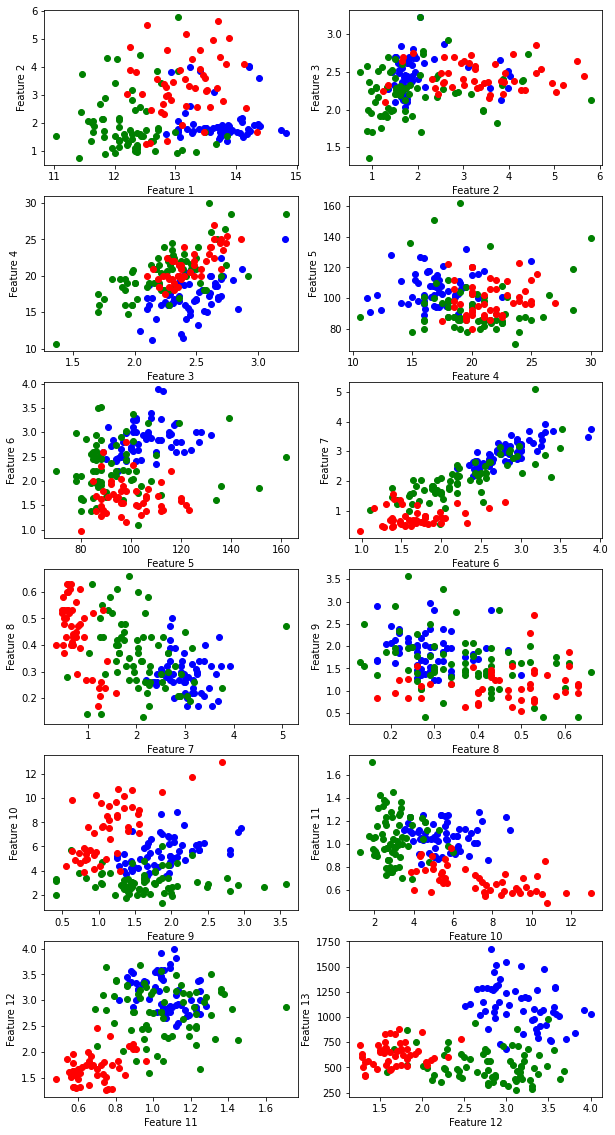

In [152]:
import matplotlib.pyplot as plt
#13個數據互相比較
fig, axs = plt.subplots(6, 2, figsize=(10, 20))
colors = ['b', 'g', 'r']
for i, ax in enumerate(axs.flat):
    for j in range(3):
        mask = (y == j)
        ax.scatter(X[mask, i], X[mask, (i + 1) % 13], c=colors[j])
    ax.set_xlabel(f'Feature {i + 1}')
    ax.set_ylabel(f'Feature {(i + 1) % 13 + 1}')
plt.show()

In [153]:
# 將數據拆分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 將訓練集和測試集轉換成PyTorch張量
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

In [154]:
# 定義多層感知器模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [155]:
# 創建多層感知器模型
model = MLP(input_size=13, hidden_size=10, num_classes=3)

In [156]:
print(X_train.shape)
print(X_test.shape)

torch.Size([124, 13])
torch.Size([54, 13])


In [157]:
# 定義損失函數和優化器
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 訓練模型
num_epochs = 10000
loss_list = []
for epoch in range(num_epochs):
    # 前向傳播
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss_list.append(loss.item())
    
    # 反向傳播並優化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/10000], Loss: 0.7719
Epoch [200/10000], Loss: 0.7531
Epoch [300/10000], Loss: 0.7874
Epoch [400/10000], Loss: 0.7305
Epoch [500/10000], Loss: 0.7415
Epoch [600/10000], Loss: 0.6990
Epoch [700/10000], Loss: 0.6716
Epoch [800/10000], Loss: 0.6691
Epoch [900/10000], Loss: 0.6731
Epoch [1000/10000], Loss: 0.6676
Epoch [1100/10000], Loss: 0.6645
Epoch [1200/10000], Loss: 0.6613
Epoch [1300/10000], Loss: 0.6587
Epoch [1400/10000], Loss: 0.6558
Epoch [1500/10000], Loss: 0.6528
Epoch [1600/10000], Loss: 0.6513
Epoch [1700/10000], Loss: 0.6492
Epoch [1800/10000], Loss: 0.6467
Epoch [1900/10000], Loss: 0.6451
Epoch [2000/10000], Loss: 0.6431
Epoch [2100/10000], Loss: 0.6411
Epoch [2200/10000], Loss: 0.6391
Epoch [2300/10000], Loss: 0.6373
Epoch [2400/10000], Loss: 0.6355
Epoch [2500/10000], Loss: 0.6337
Epoch [2600/10000], Loss: 0.6314
Epoch [2700/10000], Loss: 0.6294
Epoch [2800/10000], Loss: 0.6282
Epoch [2900/10000], Loss: 0.6267
Epoch [3000/10000], Loss: 0.6290
Epoch [3100/10000],

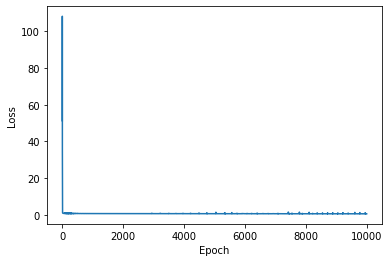

In [158]:
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [159]:
# 評估模型
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in zip(X_test, y_test):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 0)
        total += 1
        correct += (predicted == labels).sum().item()
    
    print(f'測試集準確率: {100 * correct / total:.2f}%')


測試集準確率: 74.07%


In [160]:
#保存
torch.save(model.state_dict(), 'mlp.pt')

#計算樣本概率
def predict(model, x):
    x = torch.Tensor(x)
    output = model(x)
    prob = nn.functional.softmax(output, dim=1)
    return prob.detach().numpy()

In [161]:
# 輸入未知樣本的特徵
sample_input = torch.tensor([[13.5,3.12,2.62,24,123,1.4,1.57,.22,1.25,8.60,.59,1.3,500]])

# 將特徵的維度轉換為（batch_size，input_size）
sample_input = sample_input.view(-1, 13)

In [162]:
model.load_state_dict(torch.load('mlp.pt'))

sample = [13.5,3.12,2.62,24,123,1.4,1.57,.22,1.25,8.60,.59,1.3,500]

X = torch.tensor(sample).float().view(1, -1)

# 對未知樣本進行分類
with torch.no_grad():
    output = model(X)
    prob = nn.functional.softmax(output, dim=1)
    _, predicted = torch.max(output.data, 1)
    print(f'Predicted class: {predicted.item()}')
    print(f'Probability: {prob[0][predicted].item():.4f}')
for i in range(3):
    print(f'Probability of class {i}: {prob[0][i].item():.4f}')

Predicted class: 1
Probability: 0.8177
Probability of class 0: 0.0040
Probability of class 1: 0.8177
Probability of class 2: 0.1783
